# data load

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35
# df0 = pd.read_parquet( "../data/df0.parquet" )
# df1 = pd.read_parquet( "../data/df1.parquet" )  ### 추가 피쳐: 페이백율, 할인률, 종합혜택률, 구매시각추출, 구매건카운트
# df2 = pd.read_parquet( "../data/df2.parquet" )
# df3 = pd.read_parquet( "../data/df3.parquet" )  ### 추가 피쳐: 가입시각추출, 상업코드
df2 = pd.read_parquet( "../data/df2_score.parquet" )

# print(df0.shape, df1.shape, df2.shape, df3.shape, sep=" "*5)
# display(df0.head(2))
# display(df1.head(2))
# display(df2.head(2))
# display(df3.head(2))

In [25]:
## 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## 목표
- 소비 패턴 및 금액에 따라 유저군 분류
- 여러가지 기준으로 feature를 선정
- 각각의 feature를 분포에 따라 여러 그룹으로 나누고, 해당 그룹 유저들의 총 구매 금액의 평균에 따라 점수 부여
- feature의 중요도에 따라 가중치 부여하고, 최종적인 점수를 통해 유저군 분류

## 기준: 고객 점수

In [26]:
#하위 80% 상위 15% 최상위 5%로 분리
print('normal(~80%)')
df_n = df2[df2['score']<41.6]
display(df_n.describe())
print('vip(80~95%)')
df_v = df2[(df2['score']>=41.6) & (df2['score']<51.3)]
display(df_v.describe())
print('vvip(95~%)')
df_vv = df2[df2['score']>=51.3]
display(df_vv.describe())

normal(~80%)


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000,438709.000
mean,272523.590,36.132,0.406,0.320,0.004,117228.285,108701.604,513.629,8526.681,9040.310,0.388,13.330,13.718,1.000,4.831,29.593
std,157362.246,11.843,0.491,0.466,0.065,338287.781,326277.759,2206.008,14449.224,14978.918,0.892,13.527,13.339,0.000,7.369,6.712
min,1.000,15.000,0.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,14.500
25%,136233.000,29.000,0.000,0.000,0.000,19200.000,16000.000,0.000,2000.000,2000.000,0.000,5.600,6.200,1.000,1.000,23.500
50%,272508.000,35.000,0.000,0.000,0.000,45500.000,40392.000,0.000,5000.000,5000.000,0.000,9.900,10.100,1.000,2.000,29.500
75%,408899.000,41.000,1.000,1.000,0.000,115806.000,106510.000,192.000,9700.000,10000.000,0.200,16.500,16.800,1.000,5.000,35.400
max,544921.000,121.000,1.000,1.000,1.000,66233030.000,64744230.000,202326.000,1488800.000,1488800.000,5.000,100.000,100.000,1.000,477.000,41.500


vip(80~95%)


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000,78888.000
mean,271888.107,38.951,0.194,0.768,0.011,470298.099,438562.741,3138.148,31735.359,34873.506,0.647,8.246,8.893,1.000,24.494,45.744
std,157192.242,10.052,0.395,0.422,0.103,912206.691,882048.907,6955.859,37314.205,40042.255,0.899,4.492,4.228,0.000,25.566,2.769
min,5.000,15.000,0.000,0.000,0.000,10000.000,7200.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,41.600
25%,135873.500,32.000,0.000,1.000,0.000,155388.750,141157.250,0.000,12000.000,13563.000,0.000,5.500,6.300,1.000,10.000,43.400
50%,271668.000,39.000,0.000,1.000,0.000,288081.500,266065.000,894.000,21362.000,23365.000,0.300,7.600,8.200,1.000,16.000,45.300
75%,407674.750,45.000,0.000,1.000,0.000,550761.500,512551.500,3342.000,38878.750,42203.250,0.900,10.100,10.400,1.000,30.000,48.000
max,544918.000,121.000,1.000,1.000,1.000,115005350.000,112273800.000,196824.000,2731550.000,2731550.000,5.000,52.600,53.300,1.000,426.000,51.200


vvip(95~%)


,id,age,man,push,frgn,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,score
count,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000,27324.000
mean,273110.080,42.001,0.080,1.000,0.015,970096.286,906075.712,7940.652,64020.574,71961.226,0.806,7.230,8.037,1.000,57.533,54.657
std,156716.947,9.146,0.271,0.000,0.123,938877.141,896920.923,13215.207,51744.948,58071.227,0.810,2.930,2.717,0.000,50.692,2.417
min,53.000,16.000,0.000,1.000,0.000,88367.000,80000.000,0.000,0.000,3537.000,0.000,0.000,1.400,1.000,11.000,51.300
25%,137221.250,37.000,0.000,1.000,0.000,452416.250,417750.250,1497.000,31870.000,36237.750,0.200,5.300,6.300,1.000,30.000,52.600
50%,273878.000,42.000,0.000,1.000,0.000,723600.000,670596.000,4249.500,50572.500,56243.500,0.600,6.900,7.600,1.000,45.000,54.300
75%,408274.500,48.000,0.000,1.000,0.000,1192126.500,1111263.500,9420.250,80177.250,88665.250,1.100,8.800,9.400,1.000,70.000,56.400
max,544919.000,121.000,1.000,1.000,1.000,35043786.000,34447704.000,851803.000,1150002.000,1330657.000,5.000,33.000,36.000,1.000,2705.000,61.300


## 고객 점수별 분류
- normal(df_n) = 점수 상위 80% 대 이용자 
- vip(df_v) = 점수 상위 20% 대 이용자 
- vvip(df_vv) = 점수 상위 5% 대 이용자 

# 점수별 feature 차이

## 점수 분포

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


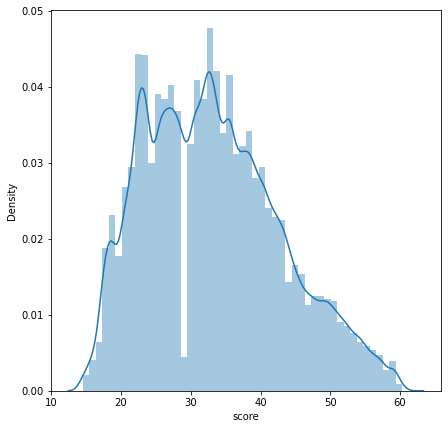

In [177]:
plt.figure(figsize=(7,7),facecolor="white")
sns.distplot(df2['score'])
plt.show()

## count

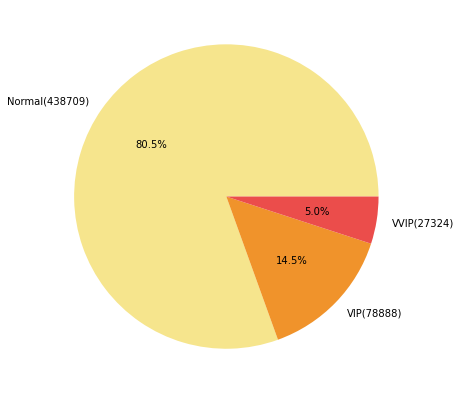

In [27]:
# 분포
plt.figure(figsize=(7,7),facecolor="white")
normal = df_n['push'].count()
vip = df_v['push'].count()
vvip = df_vv['push'].count()
labels = ['Normal'+'('+str(normal)+')','VIP'+'('+str(vip)+')','VVIP'+'('+str(vvip)+')']
plt.pie([normal,vip,vvip],labels=labels,autopct='%.1f%%',colors=['#f6e58d','#f0932b','#eb4d4b'])
plt.show()

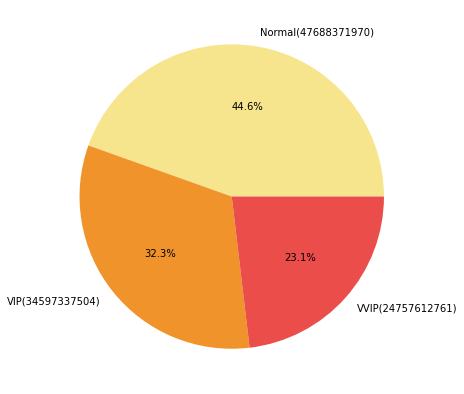

In [28]:
# 거래 금액
plt.figure(figsize=(7,7),facecolor="white")
normal = df_n['post'].sum()
vip = df_v['post'].sum()
vvip = df_vv['post'].sum()
labels = ['Normal'+'('+str(normal)+')','VIP'+'('+str(vip)+')','VVIP'+'('+str(vvip)+')']
plt.pie([normal,vip,vvip],labels=labels,autopct='%.1f%%',colors=['#f6e58d','#f0932b','#eb4d4b'])
plt.show()

### 성별

In [30]:
def genders1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    man = df2[df2['man'].values==1]['man'].count()
    woman = df2[df2['man'].values!=1]['man'].count()
    labels = ['woman'+'('+str(woman)+')','man'+'('+str(man)+')']
    plt.pie(df2['man'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#ff6b6b','#48dbfb'])

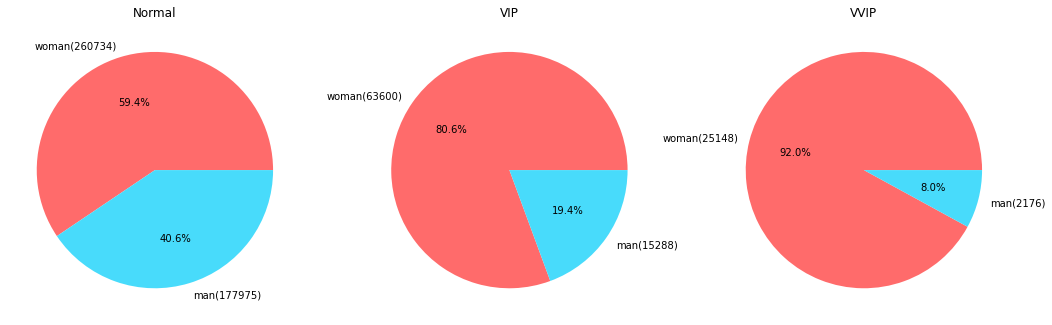

In [31]:
plt.figure(figsize=(18,6),facecolor="white")
genders1(131,'Normal',df_n)
genders1(132,'VIP',df_v)
genders1(133,'VVIP',df_vv)
plt.show()

In [95]:
def genders2(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum())
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean())
    plt.subplot(sub_loc1)
    a = df2.groupby('man').sum()['post'].reset_index()
    a.iloc[0,0] = 'woman'
    a.iloc[1,0] = 'man'
    plt.title(f'sum of purchases ({title})')
    plt.bar(a['man'],a['post'],color=['#ff6b6b','#48dbfb'])
    plt.ylim(0, limit_sum*0.6)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('man').mean()['post'].reset_index()
    b.iloc[0,0] = 'woman'
    b.iloc[1,0] = 'man'
    plt.title(f'avg of purchases ({title})')
    plt.bar(b['man'],b['post'],color=['#ff6b6b','#48dbfb'])
    plt.ylim(0, limit_avg+(limit_avg//3)*2)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/880675742.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/880675742.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/880675742.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/880675742.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/880675742.p

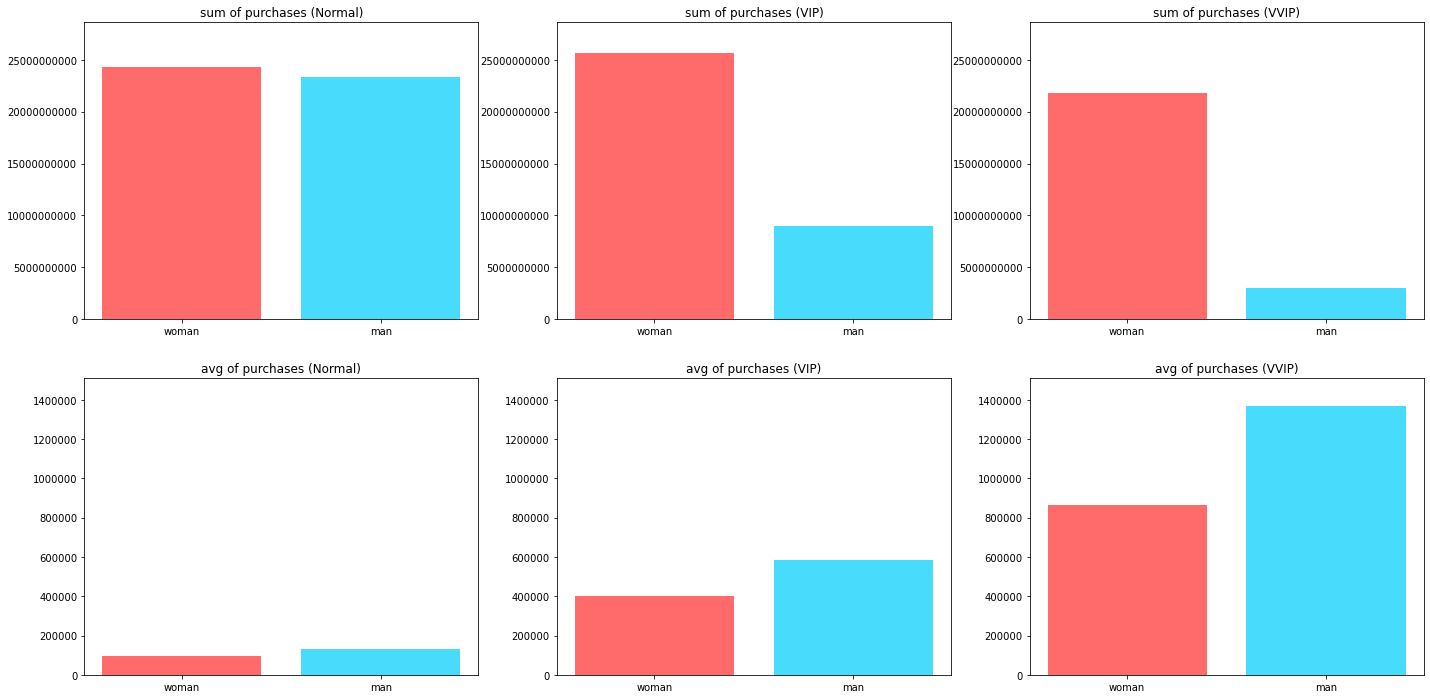

In [96]:
plt.figure(figsize=(24,12),facecolor="white")

genders2(231,234,'Normal',df_n)
genders2(232,235,'VIP',df_v)
genders2(233,236,'VVIP',df_vv)

plt.show()

### push 알림 설정 여부

In [97]:
def push1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    if df2['push'].value_counts().count() > 1:
        yes = df2[df2['push'].values==1]['push'].count()
        no = df2[df2['push'].values!=1]['push'].count()
        labels = ['No'+'('+str(no)+')','Yes'+'('+str(yes)+')']
        plt.pie(df2['push'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#feca57','#54a0ff'])
    else:
        yes = df2[df2['push'].values==1]['push'].count()
        labels = ['Yes'+'('+str(yes)+')']
        plt.pie(df2['push'].value_counts(),labels=labels,autopct='%.1f%%',colors=['#feca57','#54a0ff'])

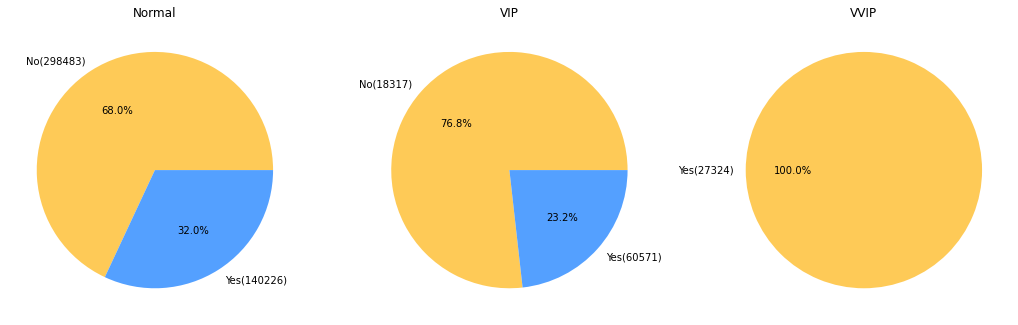

In [98]:
plt.figure(figsize=(18,6),facecolor="white")
push1(131,'Normal',df_n)
push1(132,'VIP',df_v)
push1(133,'VVIP',df_vv)
plt.show()

In [122]:
def push2(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum()) * 0.9
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean()) * 1.2
    if df2.groupby('push').sum()['post'].reset_index()['push'].count() > 1:
        plt.subplot(sub_loc1)
        a = df2.groupby('push').sum()['post'].reset_index()
        a.iloc[0,0] = 'no'
        a.iloc[1,0] = 'yes'
        plt.title(f'sum of purchases({title})')
        plt.bar(a['push'],a['post'],color=['#feca57','#54a0ff'])
        plt.ylim(0, limit_sum)
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

        plt.subplot(sub_loc2)
        b = df2.groupby('push').mean()['post'].reset_index()
        b.iloc[0,0] = 'no'
        b.iloc[1,0] = 'yes'
        plt.title(f'avg of purchases({title})')
        plt.bar(b['push'],b['post'],color=['#feca57','#54a0ff'])
        plt.ylim(0, limit_avg)
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
    else:
        plt.subplot(sub_loc1)
        a = df2.groupby('push').sum()['post'].reset_index()
        a = a.append({'push':0,'post':0},ignore_index=True)
        a = a.sort_values('push')
        a.iloc[0,0] = 'no'
        a.iloc[1,0] = 'yes'
        plt.title(f'sum of purchases({title})')
        plt.bar(a['push'],a['post'],color=['#feca57','#54a0ff'])
        plt.ylim(0, limit_sum)
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

        plt.subplot(sub_loc2)
        b = df2.groupby('push').mean()['post'].reset_index()
        b = b.append({'push':0,'post':0},ignore_index=True)
        b = b.sort_values('push')
        b.iloc[0,0] = 'no'
        b.iloc[1,0] = 'yes'
        plt.title(f'avg of purchases({title})')
        plt.bar(b['push'],b['post'],color=['#feca57','#54a0ff'])
        plt.ylim(0, limit_avg)
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2841000229.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2841000229.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2841000229.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2841000229.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2841000

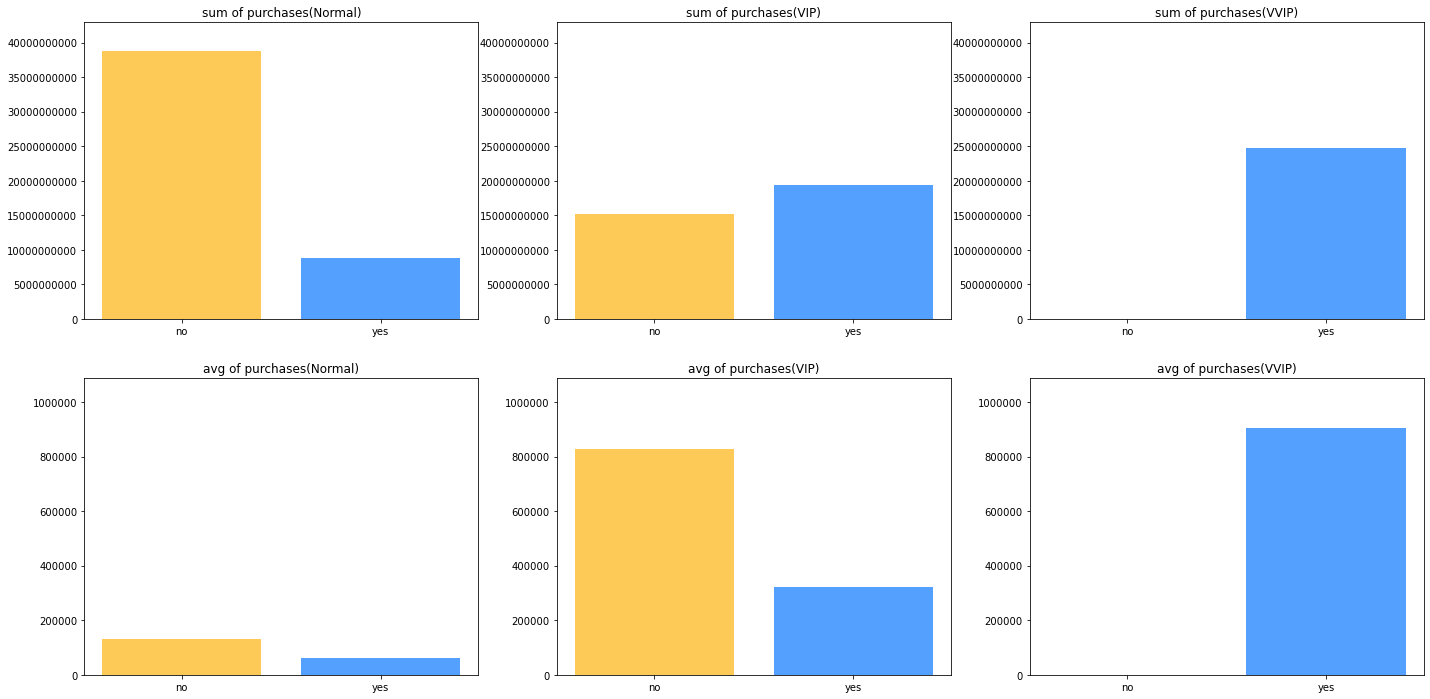

In [123]:
plt.figure(figsize=(24,12),facecolor="white")
push2(231,234,'Normal',df_n)
push2(232,235,'VIP',df_v)
push2(233,236,'VVIP',df_vv)
plt.show()

## 연령대별

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

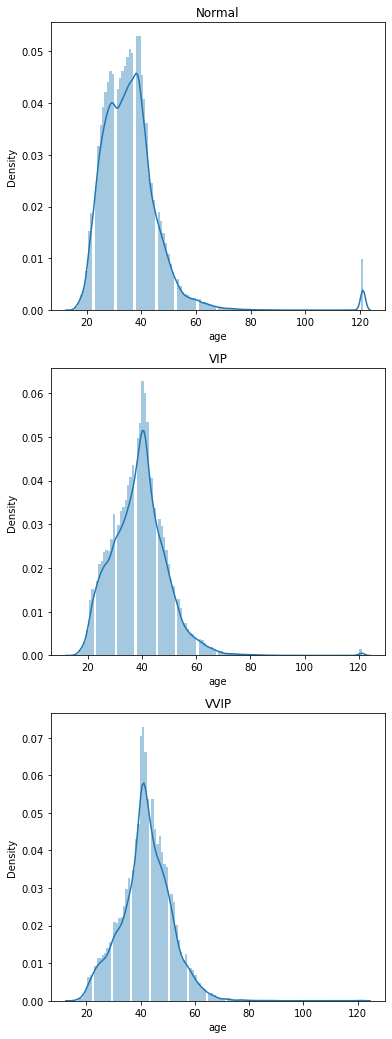

In [56]:
plt.figure(figsize=(6,18),facecolor='white')
plt.subplot(311)
plt.title('Normal')
sns.distplot(df_n['age'],bins=120)
plt.subplot(312)
plt.title('VIP')
sns.distplot(df_v['age'],bins=120)
plt.subplot(313)
plt.title('VVIP')
sns.distplot(df_vv['age'],bins=120)
plt.show()

In [136]:
def age1(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum()) * 0.06
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean()) * 3
    plt.subplot(sub_loc1)
    plt.title(f"sum of purchases({title})")
    plt.bar(df2.groupby('age').sum()['post'].index,df2.groupby('age').sum()['post'])
    plt.ylim(0, limit_sum)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    plt.title(f"avg of purchases({title})")
    plt.bar(df2.groupby('age').mean()['post'].index,df2.groupby('age').mean()['post'])
    plt.ylim(0, limit_avg)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/1860618710.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/1860618710.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/1860618710.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/1860618710.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/186061871

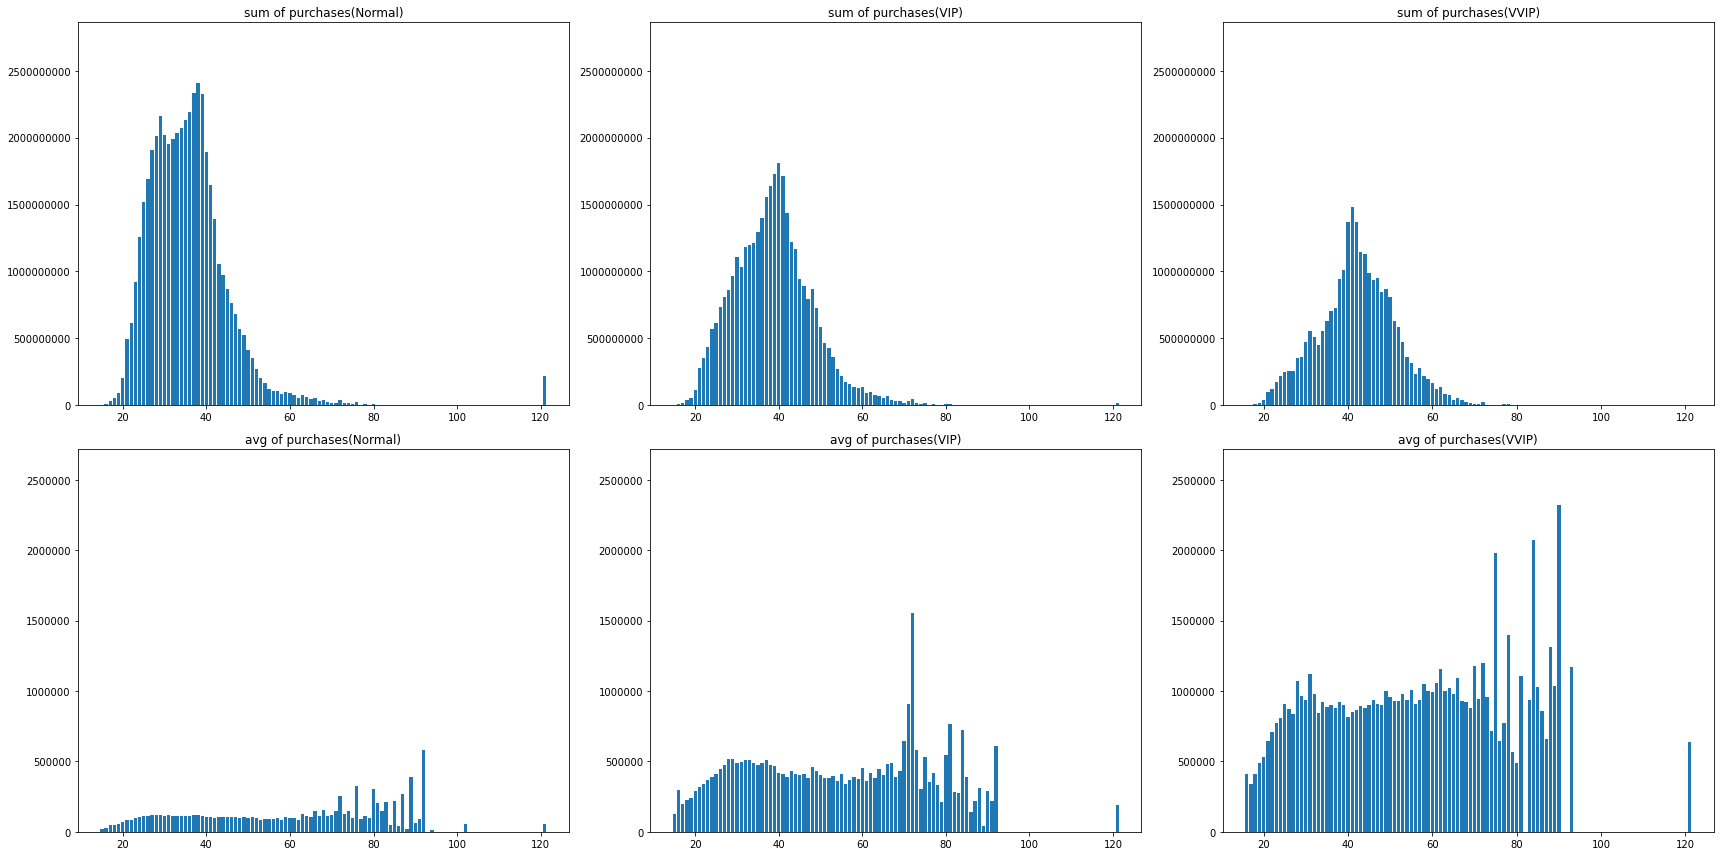

In [137]:
plt.figure(figsize=(24,12),facecolor="white")
age1(231,234,'Normal',df_n)
age1(232,235,'VIP',df_v)
age1(233,236,'VVIP',df_vv)

plt.tight_layout()
plt.show()

## 구매 횟수별 (once and more)

In [59]:
def cnt_b1(sub_loc,title,df2):
    plt.subplot(sub_loc)
    plt.title(title)
    labels = df2['cnt_b'].value_counts().index.to_list()
    plt.pie(df2['cnt_b'].value_counts(),labels=labels,autopct='%.1f%%')

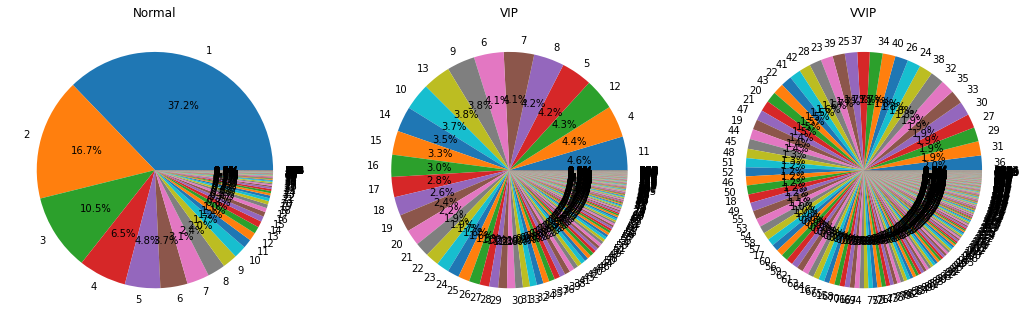

In [60]:
plt.figure(figsize=(18,6),facecolor="white")
cnt_b1(131,'Normal',df_n)
cnt_b1(132,'VIP',df_v)
cnt_b1(133,'VVIP',df_vv)
plt.show()

In [154]:
def cnt_b2(sub_loc1,sub_loc2,title,df2):
    limit_sum = max(df_n['post'].sum(),df_v['post'].sum(),df_vv['post'].sum()) * 0.12
    limit_avg = max(df_n['post'].mean(),df_v['post'].mean(),df_vv['post'].mean()) * 30
    plt.subplot(sub_loc1)
    a = df2.groupby('cnt_b').sum()['post'].reset_index()
    a.iloc[0,0] = 'no'
    a.iloc[1,0] = 'yes'
    plt.title(f'sum of purchases({title})')
    plt.bar(df2.groupby('cnt_b').sum()['post'].index,df2.groupby('cnt_b').sum()['post'])
    plt.ylim(0, limit_sum)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('cnt_b').mean()['post'].reset_index()
    b.iloc[0,0] = 'no'
    b.iloc[1,0] = 'yes'
    plt.title(f'avg of purchases({title})')
    plt.bar(df2.groupby('cnt_b').mean()['post'].index,df2.groupby('cnt_b').mean()['post'])
    plt.ylim(0, limit_avg)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2861979201.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2861979201.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2861979201.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2861979201.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2861979

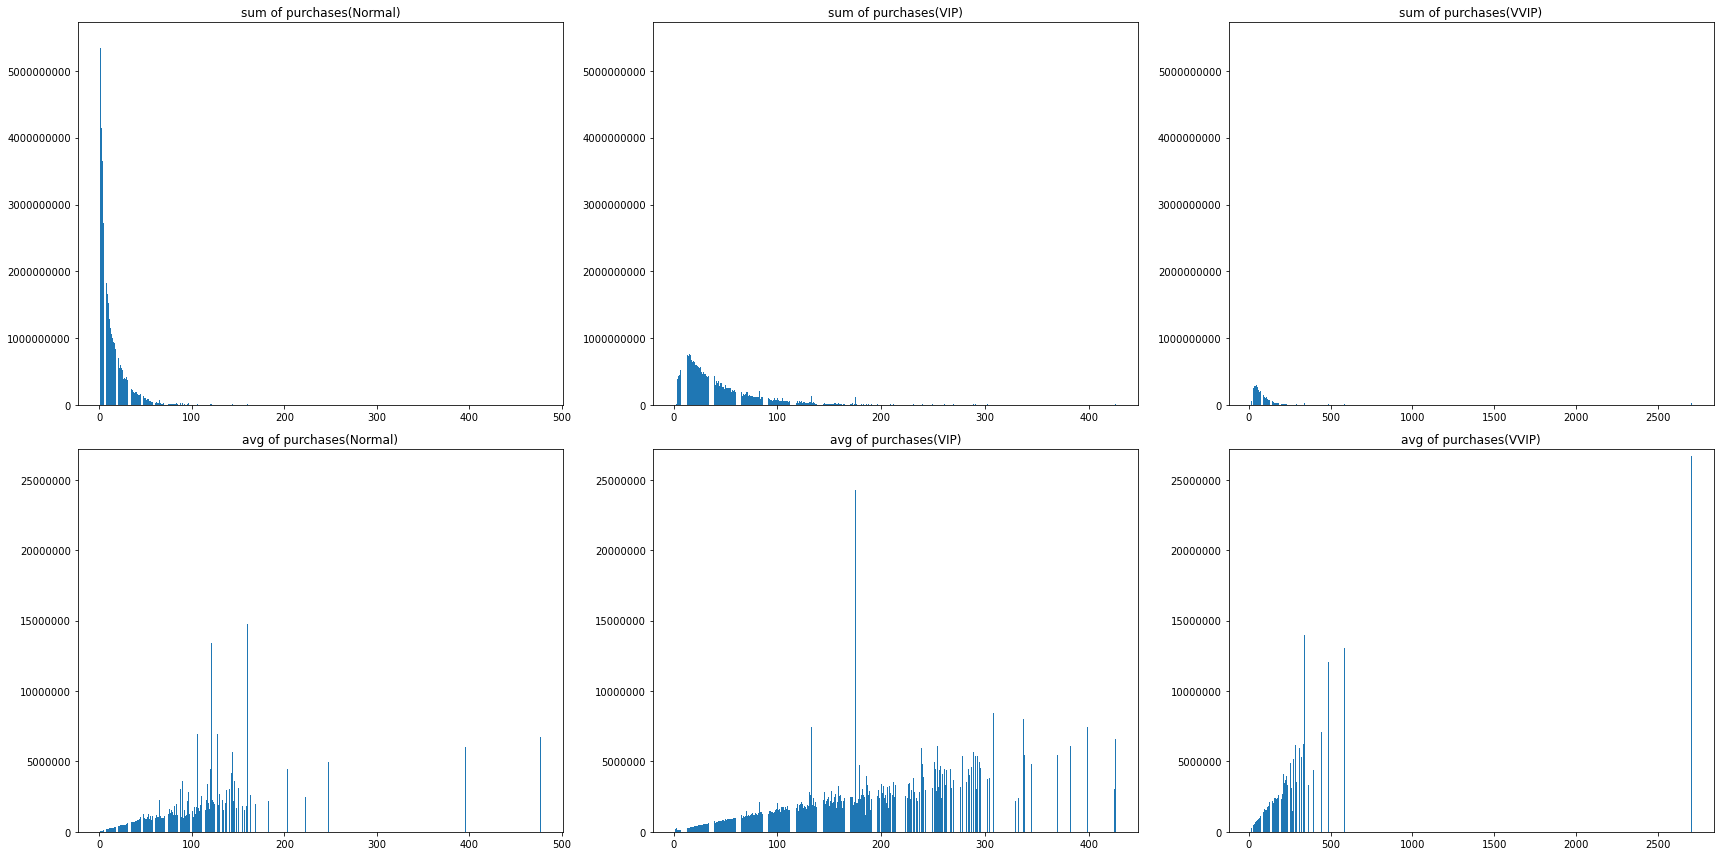

In [155]:
plt.figure(figsize=(24,12),facecolor="white")
cnt_b2(231,234,'Normal',df_n)
cnt_b2(232,235,'VIP',df_v)
cnt_b2(233,236,'VVIP',df_vv)

plt.tight_layout()
plt.show()

## 할인율

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

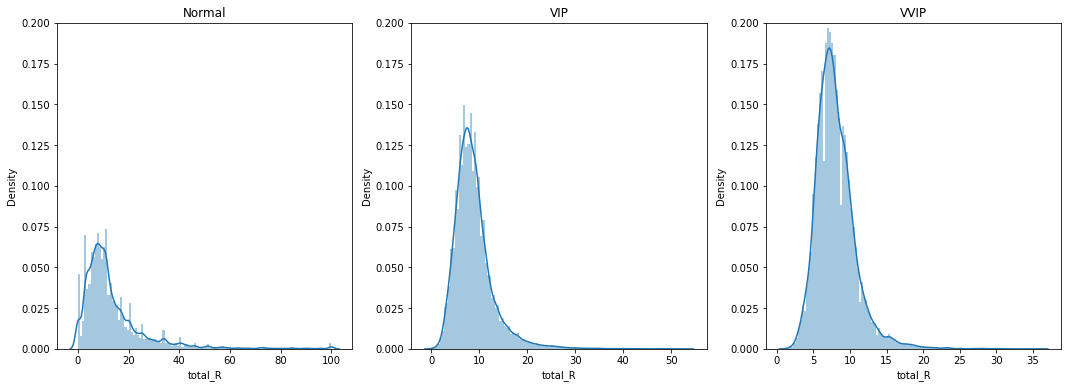

In [158]:
plt.figure(figsize=(18,6),facecolor='white')
plt.subplot(131)
plt.title('Normal')
sns.distplot(df_n['total_R'],bins=120)
plt.ylim(0,0.2)
plt.subplot(132)
plt.title('VIP')
sns.distplot(df_v['total_R'],bins=120)
plt.ylim(0,0.2)
plt.subplot(133)
plt.title('VVIP')
sns.distplot(df_vv['total_R'],bins=120)
plt.ylim(0,0.2)
plt.show()

In [171]:
def total_R1(sub_loc1,sub_loc2,title,df2):
    plt.subplot(sub_loc1)
    plt.title(f'sum of purchases({title})')
    a = df2.groupby('push').sum()['post'].reset_index()
    plt.bar(df2.groupby('total_R').sum()['post'].index,df2.groupby('total_R').sum()['post'])
    plt.ylim(0,2500000000)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

    plt.subplot(sub_loc2)
    b = df2.groupby('push').mean()['post'].reset_index()
    plt.title(f'avg of purchases({title})')
    plt.bar(df2.groupby('total_R').mean()['post'].index,df2.groupby('total_R').mean()['post'])
    plt.ylim(0,10000000)
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2514274755.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2514274755.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2514274755.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/2514274755.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_16486/251427475

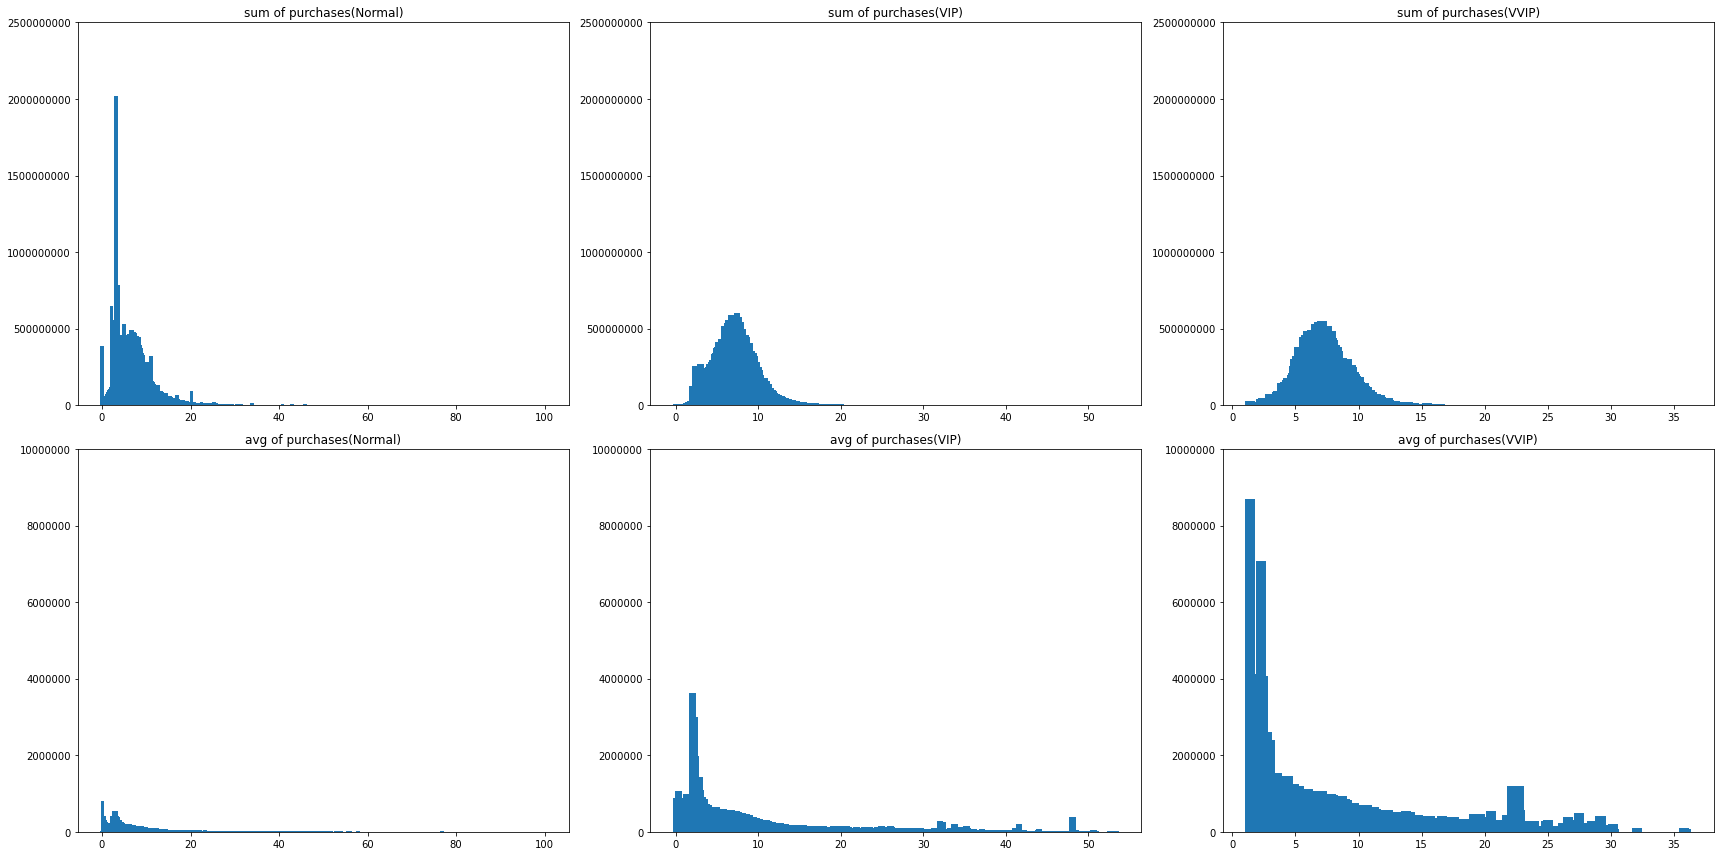

In [172]:
plt.figure(figsize=(24,12),facecolor="white")
total_R1(231,234,'Normal',df_n)
total_R1(232,235,'VIP',df_v)
total_R1(233,236,'VVIP',df_vv)

plt.tight_layout()
plt.show()

##